In [4]:
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/
!chmod 600 ~/.kaggle/kaggle.json

In [5]:
!kaggle datasets download -d vikashrajluhaniwal/fashion-images

 97% 326M/335M [00:02<00:00, 186MB/s]
100% 335M/335M [00:02<00:00, 133MB/s]


In [6]:
from zipfile import ZipFile
dataset = '/content/fashion-images.zip'

with ZipFile(dataset,'r') as zip:
  zip.extractall()
  print('The dataset is extracted')

The dataset is extracted


In [7]:
import tensorflow
from keras.applications.resnet50 import ResNet50,preprocess_input
from keras.layers import GlobalMaxPooling2D

In [8]:
model=ResNet50(weights='imagenet',include_top=False,input_shape=(224,224,3))
model.trainable=False

94765736/94765736 [==============================] - 1s 0us/step


In [9]:
model=tensorflow.keras.Sequential([
    model,
    GlobalMaxPooling2D()
])

In [10]:
import cv2
from google.colab.patches import cv2_imshow
import numpy as np
import pandas as pd
import os
from PIL import Image
from numpy.linalg import norm

In [11]:
dataset=pd.read_csv('/content/data/fashion.csv')
dataset.head()

,ProductId,Gender,Category,SubCategory,ProductType,Colour,Usage,ProductTitle,Image,ImageURL
0,42419,Girls,Apparel,Topwear,Tops,White,Casual,Gini and Jony Girls Knit White Top,42419.jpg,http://assets.myntassets.com/v1/images/style/p...
1,34009,Girls,Apparel,Topwear,Tops,Black,Casual,Gini and Jony Girls Black Top,34009.jpg,http://assets.myntassets.com/v1/images/style/p...
2,40143,Girls,Apparel,Topwear,Tops,Blue,Casual,Gini and Jony Girls Pretty Blossom Blue Top,40143.jpg,http://assets.myntassets.com/v1/images/style/p...
3,23623,Girls,Apparel,Topwear,Tops,Pink,Casual,Doodle Kids Girls Pink I love Shopping Top,23623.jpg,http://assets.myntassets.com/v1/images/style/p...
4,47154,Girls,Apparel,Bottomwear,Capris,Black,Casual,Gini and Jony Girls Black Capris,47154.jpg,http://assets.myntassets.com/v1/images/style/p...


In [12]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2906 entries, 0 to 2905
Data columns (total 10 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   ProductId     2906 non-null   int64 
 1   Gender        2906 non-null   object
 2   Category      2906 non-null   object
 3   SubCategory   2906 non-null   object
 4   ProductType   2906 non-null   object
 5   Colour        2906 non-null   object
 6   Usage         2906 non-null   object
 7   ProductTitle  2906 non-null   object
 8   Image         2906 non-null   object
 9   ImageURL      2906 non-null   object
dtypes: int64(1), object(9)
memory usage: 227.2+ KB


In [16]:
feature_list=[]
filename_list=list(dataset['ImageURL'])

In [17]:
filename_list[0]

'http://assets.myntassets.com/v1/images/style/properties/f3964f76c78edd85f4512d98b26d52e9_images.jpg'

In [18]:
boys_folder=os.listdir('/content/data/Apparel/Boys/Images/images_with_product_ids')
print(boys_folder)
print(len(boys_folder))

['34104.jpg', '5419.jpg', '41745.jpg', '5486.jpg', '35461.jpg', '34056.jpg', '36322.jpg', '39857.jpg', '9952.jpg', '34185.jpg', '41754.jpg', '42778.jpg', '5216.jpg', '31109.jpg', '24906.jpg', '46833.jpg', '22586.jpg', '8336.jpg', '25504.jpg', '40982.jpg', '4188.jpg', '48245.jpg', '31097.jpg', '33306.jpg', '4219.jpg', '38954.jpg', '34098.jpg', '39839.jpg', '15572.jpg', '43693.jpg', '4211.jpg', '36325.jpg', '40136.jpg', '30720.jpg', '36001.jpg', '37527.jpg', '36725.jpg', '38884.jpg', '39861.jpg', '37622.jpg', '38939.jpg', '31159.jpg', '8337.jpg', '39837.jpg', '43685.jpg', '39860.jpg', '3817.jpg', '37621.jpg', '37344.jpg', '41968.jpg', '15574.jpg', '33140.jpg', '38999.jpg', '48258.jpg', '31156.jpg', '36320.jpg', '48242.jpg', '38942.jpg', '40162.jpg', '40125.jpg', '35435.jpg', '35460.jpg', '34173.jpg', '39003.jpg', '31094.jpg', '34018.jpg', '3810.jpg', '42583.jpg', '15046.jpg', '40924.jpg', '33264.jpg', '8327.jpg', '38494.jpg', '39843.jpg', '36717.jpg', '31090.jpg', '34057.jpg', '40141.jpg

In [ ]:
for i in range(759):
  img_path='/content/data/Apparel/Boys/Images/images_with_product_ids/'+boys_folder[i]
  img_pillow=Image.open(img_path)
  img_color=img_pillow.convert('RGB')
  img_resize=img_color.resize((224,224))
  img_arr=np.array(img_resize)
  img_expand=np.expand_dims(img_arr,axis=0)
  pre_process_img=preprocess_input(img_expand)
  result=model.predict(pre_process_img).flatten()
  normalized=result/norm(result)
  feature_list.append(normalized)

In [20]:
girls_folder=os.listdir('/content/data/Apparel/Girls/Images/images_with_product_ids')
print(girls_folder)
print(len(girls_folder))

['2701.jpg', '41759.jpg', '46835.jpg', '2705.jpg', '4718.jpg', '8367.jpg', '18178.jpg', '37613.jpg', '17621.jpg', '3819.jpg', '37627.jpg', '34159.jpg', '31121.jpg', '40932.jpg', '43691.jpg', '39323.jpg', '38907.jpg', '37590.jpg', '33266.jpg', '34157.jpg', '37571.jpg', '39845.jpg', '38504.jpg', '41001.jpg', '4723.jpg', '47153.jpg', '3899.jpg', '50721.jpg', '37581.jpg', '43592.jpg', '41744.jpg', '23132.jpg', '34005.jpg', '38769.jpg', '2712.jpg', '39328.jpg', '2715.jpg', '26983.jpg', '31117.jpg', '40148.jpg', '2700.jpg', '34113.jpg', '4193.jpg', '36750.jpg', '40943.jpg', '3901.jpg', '4186.jpg', '41972.jpg', '36749.jpg', '10672.jpg', '40997.jpg', '41999.jpg', '34009.jpg', '39755.jpg', '37628.jpg', '16806.jpg', '40128.jpg', '12849.jpg', '18166.jpg', '16803.jpg', '34110.jpg', '18172.jpg', '41756.jpg', '36728.jpg', '38326.jpg', '38905.jpg', '34094.jpg', '35446.jpg', '40998.jpg', '38944.jpg', '34007.jpg', '40944.jpg', '37629.jpg', '37574.jpg', '35432.jpg', '39325.jpg', '31172.jpg', '3851.jpg',

In [ ]:
for i in range(567):
  img_path='/content/data/Apparel/Girls/Images/images_with_product_ids/'+girls_folder[i]
  img_pillow=Image.open(img_path)
  img_color=img_pillow.convert('RGB')
  img_resize=img_color.resize((224,224))
  img_arr=np.array(img_resize)
  img_expand=np.expand_dims(img_arr,axis=0)
  pre_process_img=preprocess_input(img_expand)
  result=model.predict(pre_process_img).flatten()
  normalized=result/norm(result)
  feature_list.append(normalized)

In [22]:
men_folder=os.listdir('/content/data/Footwear/Men/Images/images_with_product_ids')
print(men_folder)
print(len(men_folder))

['19310.jpg', '26591.jpg', '29123.jpg', '4343.jpg', '11914.jpg', '33848.jpg', '22198.jpg', '26539.jpg', '23885.jpg', '50776.jpg', '54521.jpg', '13072.jpg', '3558.jpg', '15379.jpg', '49061.jpg', '15516.jpg', '5600.jpg', '29124.jpg', '7731.jpg', '42019.jpg', '16969.jpg', '57509.jpg', '4524.jpg', '44947.jpg', '39943.jpg', '15714.jpg', '15062.jpg', '26562.jpg', '3159.jpg', '3569.jpg', '54516.jpg', '54526.jpg', '31971.jpg', '35777.jpg', '6817.jpg', '23847.jpg', '24408.jpg', '44785.jpg', '9001.jpg', '6448.jpg', '58328.jpg', '41436.jpg', '22152.jpg', '7593.jpg', '9037.jpg', '6619.jpg', '17647.jpg', '35575.jpg', '3594.jpg', '16153.jpg', '44940.jpg', '3168.jpg', '40778.jpg', '6811.jpg', '41867.jpg', '44712.jpg', '13080.jpg', '10180.jpg', '3560.jpg', '26599.jpg', '9431.jpg', '4112.jpg', '2227.jpg', '5459.jpg', '39989.jpg', '20893.jpg', '1654.jpg', '12958.jpg', '12882.jpg', '11915.jpg', '57481.jpg', '9055.jpg', '22136.jpg', '3790.jpg', '9036.jpg', '3556.jpg', '8914.jpg', '19372.jpg', '2504.jpg', 

In [ ]:
for i in range(811):
  img_path='/content/data/Footwear/Men/Images/images_with_product_ids/'+men_folder[i]
  img_pillow=Image.open(img_path)
  img_color=img_pillow.convert('RGB')
  img_resize=img_color.resize((224,224))
  img_arr=np.array(img_resize)
  img_expand=np.expand_dims(img_arr,axis=0)
  pre_process_img=preprocess_input(img_expand)
  result=model.predict(pre_process_img).flatten()
  normalized=result/norm(result)
  feature_list.append(normalized)

In [24]:
women_folder=os.listdir('/content/data/Footwear/Women/Images/images_with_product_ids')
print(women_folder)
print(len(women_folder))

['56882.jpg', '45355.jpg', '36419.jpg', '41723.jpg', '47591.jpg', '7816.jpg', '36136.jpg', '8085.jpg', '59050.jpg', '17684.jpg', '54119.jpg', '13042.jpg', '56972.jpg', '57304.jpg', '14462.jpg', '4638.jpg', '17679.jpg', '54117.jpg', '44464.jpg', '20762.jpg', '20947.jpg', '32848.jpg', '56968.jpg', '49808.jpg', '53136.jpg', '5373.jpg', '44204.jpg', '50784.jpg', '15497.jpg', '5630.jpg', '23878.jpg', '33108.jpg', '20777.jpg', '15723.jpg', '20949.jpg', '13704.jpg', '39577.jpg', '35821.jpg', '47531.jpg', '3463.jpg', '46087.jpg', '54145.jpg', '56959.jpg', '17677.jpg', '2627.jpg', '5380.jpg', '39208.jpg', '19045.jpg', '4637.jpg', '12824.jpg', '33131.jpg', '53870.jpg', '59326.jpg', '45384.jpg', '27075.jpg', '37960.jpg', '8526.jpg', '5917.jpg', '34517.jpg', '6645.jpg', '5904.jpg', '5381.jpg', '4170.jpg', '17016.jpg', '10309.jpg', '5942.jpg', '45323.jpg', '39607.jpg', '33823.jpg', '12421.jpg', '29237.jpg', '7594.jpg', '46596.jpg', '20765.jpg', '54144.jpg', '57854.jpg', '4655.jpg', '47537.jpg', '91

In [ ]:
for i in range(769):
  img_path='/content/data/Footwear/Women/Images/images_with_product_ids/'+women_folder[i]
  img_pillow=Image.open(img_path)
  img_color=img_pillow.convert('RGB')
  img_resize=img_color.resize((224,224))
  img_arr=np.array(img_resize)
  img_expand=np.expand_dims(img_arr,axis=0)
  pre_process_img=preprocess_input(img_expand)
  result=model.predict(pre_process_img).flatten()
  normalized=result/norm(result)
  feature_list.append(normalized)

In [26]:
from sklearn.neighbors import NearestNeighbors

In [27]:
neighbors=NearestNeighbors(n_neighbors=5,algorithm='brute',metric='euclidean')

In [28]:
neighbors.fit(feature_list)

NearestNeighbors(algorithm='brute', metric='euclidean')

In [32]:
distance,indices=neighbors.kneighbors([feature_list[0]])

In [33]:
for file in indices[0][0:5]:
  print(file)

0
567
352
557
111


In [31]:
import pickle

pickle.dump(feature_list,open('featurevector.pkl','wb'))
pickle.dump(filename_list,open('filenames.pkl','wb'))

1/1 [==============================] - 0s 197ms/step


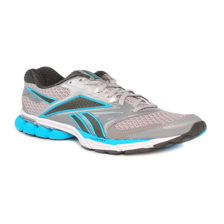

In [34]:
img_path='/content/data/Footwear/Men/Images/images_with_product_ids/10037.jpg'
img_pillow=Image.open(img_path)
img_color=img_pillow.convert('RGB')
img_resize=img_color.resize((224,224))
img_arr=np.array(img_resize)
expand_img=np.expand_dims(img_arr,axis=0)
pre_process_img=preprocess_input(expand_img)
result=model.predict(pre_process_img).flatten()
normalized=result/norm(result)
cv2_imshow(img_arr)

In [35]:
neighbors=NearestNeighbors(n_neighbors=5,algorithm='brute',metric='euclidean')

In [36]:
neighbors.fit(feature_list)

NearestNeighbors(algorithm='brute', metric='euclidean')

In [37]:
distance,indices=neighbors.kneighbors([normalized])

In [38]:
indices[0][0:5]

array([1797, 1655, 1996, 1621, 2454])

In [39]:
for file in indices[0][0:10]:
  print(filename_list[file])

http://assets.myntassets.com/v1/images/style/properties/6e70da257e2040ff7823c9e9da1b5a87_images.jpg
http://assets.myntassets.com/v1/images/style/properties/1e404f8311c96db483657b8ef4113d56_images.jpg
http://assets.myntassets.com/v1/images/style/properties/b9c487b15356b9d36c0e803b43adad76_images.jpg
http://assets.myntassets.com/v1/images/style/properties/a534fc3afe0802b1a9d84e28a34104aa_images.jpg
http://assets.myntassets.com/v1/images/style/properties/6c5b3ea71c4b1365df13de7320626602_images.jpg


In [41]:
import requests
from io import BytesIO

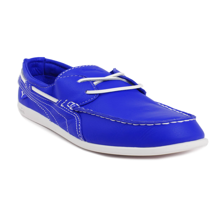

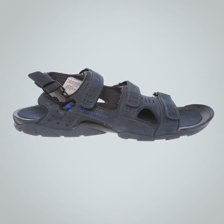

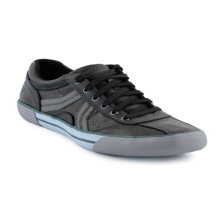

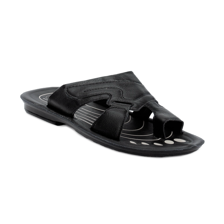

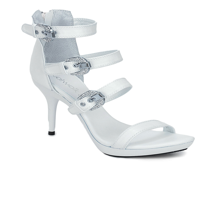

In [42]:
for file in indices[0][0:5]:
    img_url = filename_list[file]

    # Download the image from the URL
    response = requests.get(img_url)

    if response.status_code == 200:
        # Open the image using PIL
        img_pillow = Image.open(BytesIO(response.content))
        img_color = img_pillow.convert('RGB')
        img_resize = img_color.resize((224, 224))
        img_arr=np.array(img_resize)
        cv2_imshow(img_arr)